In [ ]:
import pandas as pd
import numpy as np
import random
import string
pd.options.mode.chained_assignment = None

In [ ]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Noise

In [ ]:
class NoiseTrader:

    def __init__(self):
        #super().init(unique_id, model)
        self.cash_balance = max(round(np.abs(np.random.normal(100000, 200000))), 60000)
        self.asset_balance = round(np.random.uniform(0, 100))
        #self.i = 0
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.NT = model

    def print_bal(self):
        print("Cash =", self.cash_balance, "; ", "Assets =", self.asset_balance)

    def step(self) -> None:
        if (self.cash_balance > 0) or (self.asset_balance > 0):
            print("Cash =", self.cash_balance, "; ", "Assets =", self.asset_balance)
            self.trade()
            self.NT.matching()
            self.update_balance()
            print("Cash =", self.cash_balance, "; ", "Assets =", self.asset_balance)
            #self.i += 1

    def _offset_from_power_law_distribution(self):
        alpha = 3.0  # Показатель степенной зависимости.
        xmin = 0.01  # Минимальное значение переменной.
        xmax = 1.0  # Максимальное значение переменной.
        rand = np.random.uniform(0, 1)  # Случайное значение.
        offset = ((rand * (xmax**(alpha + 1) - xmin**(alpha + 1)) + xmin**(alpha + 1))**(1 / (alpha + 1))) * xmax
        return offset

    def trade(self):
        r = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        r3 = np.random.uniform(0, 1)
        #p = OrderBook()
        order = np.array([])
        self.order_id = self.NT.generate_id()
        self.price = self.NT.generate_price()
        if r >= 0.5 and self.cash_balance >= self.price:
            self.action = "ask"
            if 0 < r3 and r3 < 0.35:   # limit price
                self.order_type = "limit"
                if r2 < 0.35:
                    self.price = np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    self.maxstocks = self.cash_balance//self.price
                    self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
                else:
                    offset = self._offset_from_power_law_distribution()
                    self.price = self.NT.get_best_ask() + offset
                    self.maxstocks = self.cash_balance//self.price
                    self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
            elif 0.35 < r3 and r3 < 0.5:   # market price
                self.order_type = "market"
                if (self.NT.market_bid_info() != True):
                    self.price = self.NT.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                    self.maxstocks = self.cash_balance//self.price
                    self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
                    self.NT.market_match(self.action, self.order_id)
            else:
                self.action = "None"

        elif r < 0.5 and self.asset_balance > 0:
            self.action = "bid"
            if 0 < r3 and r3 < 0.35:   # limit price
                self.order_type = "limit"
                if r2 < 0.35:
                    self.price = np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
                else:
                    offset = self._offset_from_power_law_distribution()
                    self.price = self.NT.get_best_bid() - offset
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
            elif 0.35 < r3 and r3 < 0.5:   # market price
                self.order_type = "market"
                if (self.NT.market_ask_info() != True):
                    self.price = self.NT.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                    #self.maxstocks = self.cash_balance//self.price
                    self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                    self.order_id = "NT-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                    order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                    self.NT.add_order(order)
                    self.NT.market_match(self.action, self.order_id)
            else:
                self.action = "None"

        return order

    def update_balance(self):
        if self.action != "None":
            trades = self.NT.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"

# MM


In [ ]:
class HFTMarketMakingAgent:
    def __init__(self):
        self.cash_balance = max(round(np.abs(np.random.normal(100000, 200000))), 60000)
        self.inventory = round(np.random.uniform(-10, 10))
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.MM = model

    def trade(self):
        # Determine bid and offer order sizes
        # Place bid and offer limit orders
        bid_price = self.get_bid_price()
        ask_price = self.get_ask_price()
        self.UL = self.cash_balance / ask_price
        self.LL = self.cash_balance / bid_price
        totbidsize = max(0, self.UL - 1 - self.inventory)
        totasksize = max(0, self.inventory - self.LL - 1)
        bid_order_size = self.get_order_size(totbidsize, bid=True)
        ask_order_size = self.get_order_size(totasksize, bid=False)
        order = np.array([])
        order_id = self.MM.generate_id()
        self.bid_order_id = "MM-" + order_id + "-" + str(round(float(bid_price),2)) + "-" + str(bid_order_size)
        order = np.append(order, [round(float(bid_price),2), bid_order_size, self.bid_order_id, "limit", "bid"])
        self.MM.add_order(order)

        order = np.array([])
        self.ask_order_id = "MM-" + order_id + "-" + str(round(float(ask_price),2)) + "-" + str(ask_order_size)
        order = np.append(order, [round(float(ask_price),2), ask_order_size, self.ask_order_id, "limit", "ask"])
        self.MM.add_order(order)

    def get_bid_price(self):
        best_bid = self.MM.get_best_bid()
        best_ask = self.MM.get_best_ask()
        baseoffset = -(((best_ask - best_bid) - 1) * (self.inventory / (self.cash_balance / best_ask)))
        bid_price = best_bid + baseoffset
        # Check that bid price is within price banding constraints   self.NT.get_best_ask(), self.NT.get_best_bid()
        last_traded_price = self.MM.last_traded_price()
        k = 1
        if (((last_traded_price - k) > best_bid) & (best_bid < (last_traded_price + k))) & (((last_traded_price - k) > best_ask) & (best_ask < (last_traded_price + k))):
            return bid_price
        else:
            if abs(bid_price - (last_traded_price - k)) < abs(bid_price - (last_traded_price + k)):
                bid_price = (last_traded_price - k) + baseoffset if bid_price < (last_traded_price - k) + baseoffset else bid_price
                return bid_price
            else:
                bid_price = (last_traded_price + k) + baseoffset if bid_price > (last_traded_price + k) + baseoffset else bid_price
                return bid_price

    def get_ask_price(self):
        best_bid = self.MM.get_best_bid()
        best_ask = self.MM.get_best_ask()
        baseoffset = -(((best_ask - best_bid) - 1) * (self.inventory / (self.cash_balance / best_ask)))
        ask_price = best_ask + baseoffset
        # Check that offer price is within price banding constraints
        last_traded_price = self.MM.last_traded_price()
        k = 1
        if (((last_traded_price - k) > best_bid) & (best_bid < (last_traded_price + k))) & (((last_traded_price - k) > best_ask) & (best_ask < (last_traded_price + k))):
            return ask_price
        else:
            if abs(ask_price - (last_traded_price - k)) < abs(ask_price - (last_traded_price + k)):
                ask_price = (last_traded_price - k) + baseoffset if ask_price < (last_traded_price - k) + baseoffset else ask_price
                return ask_price
            else:
                ask_price = (last_traded_price + k) + baseoffset if ask_price > (last_traded_price + k) + baseoffset else ask_price
                return ask_price

    def get_order_size(self, limit_size, bid=True):
        if bid:
            order_size = limit_size if limit_size <= self.LL else self.LL
        else:
            order_size = limit_size if limit_size <= self.UL else self.UL
        return order_size

    def update_balance(self):
        ask_trades = self.MM.get_info_trade(self.ask_order_id, "ask")
        ask_trades = ask_trades.apply(pd.to_numeric)
        bid_trades = self.MM.get_info_trade(self.bid_order_id, "bid")
        bid_trades = bid_trades.apply(pd.to_numeric)
        for i in range(len(ask_trades)):
            self.inventory += ask_trades["quantity"].iloc[i]
            self.cash_balance = round(self.cash_balance - (ask_trades["price"].iloc[i] * ask_trades["quantity"].iloc[i]),2)

        for i in range(len(bid_trades)):
            self.inventory -= bid_trades["quantity"].iloc[i]
            self.cash_balance = round(self.cash_balance + (bid_trades["price"].iloc[i] * bid_trades["quantity"].iloc[i]),2)

## MA


In [ ]:
class MovingAverageTrader:
    def __init__(self):
        self.cash_balance = max(round(np.abs(np.random.normal(100000, 200000))), 60000)
        self.asset_balance = round(np.random.uniform(0, 100))
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.MA = model

    def trade(self):
        r = np.random.uniform(0, 1)
        self.MA.update_ma()
        self.ma = np.mean(self.MA.ma_history)
        self.price = self.MA.generate_price()
        self.order_id = self.MA.generate_id()
        order = np.array([])
        if r > 0.5:
            self.order_type = "limit"
            if len(self.MA.ma_history) == 10 and self.price > self.ma and self.asset_balance > 0:
                self.action = "bid"
                self.price = np.random.uniform(self.MA.get_best_ask(), self.MA.get_best_bid())
                self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                self.MA.add_order(order)
            elif len(self.MA.ma_history) == 10 and self.price < self.ma and self.cash_balance >= self.price:
                self.action = "ask"
                self.price = np.random.uniform(self.MA.get_best_ask(), self.MA.get_best_bid())
                self.maxstocks = self.cash_balance//self.price
                self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                self.MA.add_order(order)
            else:
                self.action = "None"
        else:
              self.order_type = "market"
              if (self.MA.market_ask_info() != True) and len(self.MA.ma_history) == 10 and self.price > self.ma and self.asset_balance > 0:
                  self.action = "bid"
                  self.price = self.MA.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                  #self.maxstocks = self.cash_balance//self.price
                  self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                  self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                  order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                  self.MA.add_order(order)
                  self.MA.market_match(self.action, self.order_id)
              elif (self.MA.market_ask_info() != True) and len(self.MA.ma_history) == 10 and self.price < self.ma and self.cash_balance >= self.price:
                  self.action = "ask"
                  self.price = self.MA.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                  self.maxstocks = self.cash_balance//self.price
                  self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                  self.order_id = "MA-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                  order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                  self.MA.add_order(order)
                  self.MA.market_match(self.action, self.order_id)
              else:
                  self.action = "None"

    def update_balance(self):
        if self.action != "None":
            trades = self.MA.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"


## RSI

In [ ]:
class RSITrader:
    def __init__(self):
        self.cash_balance = max(round(np.abs(np.random.normal(100000, 100000))), 30000)
        self.asset_balance = round(np.random.uniform(0, 100))
        self.action = "None"
        self.order_type = "None"

    def connection(self, model):
        self.RSI = model

    def trade(self):
        r = np.random.uniform(0, 1)
        self.RSI.update_rsi()
        self.rsi = self.RSI.rsi()
        self.price = self.RSI.generate_price()
        self.order_id = self.RSI.generate_id()
        order = np.array([])
        if r > 0.5:
            self.order_type = "limit"
            if len(self.RSI.rsi_history) == 14 and self.rsi > 70 and self.asset_balance > 0:
                self.action = "bid"
                self.price = np.random.uniform(self.RSI.get_best_ask(), self.RSI.get_best_bid())
                self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                self.RSI.add_order(order)
            elif len(self.RSI.rsi_history) == 14 and self.rsi < 30 and self.cash_balance >= self.price:
                self.action = "ask"
                self.price = np.random.uniform(self.RSI.get_best_ask(), self.RSI.get_best_bid())
                self.maxstocks = self.cash_balance//self.price
                self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                self.RSI.add_order(order)
        else:
              self.order_type = "market"
              if (self.RSI.market_ask_info() != True) and len(self.RSI.rsi_history) == 14 and self.rsi > 70 and self.asset_balance > 0:
                  self.action = "bid"
                  self.price = self.RSI.get_best_ask()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid())
                  #self.maxstocks = self.cash_balance//self.price
                  self.quantity = max(min(round(np.random.lognormal(3, 2)), self.asset_balance), 1)
                  self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                  order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                  self.RSI.add_order(order)
                  self.RSI.market_match(self.action, self.order_id)
              elif (self.RSI.market_ask_info() != True) and len(self.RSI.rsi_history) == 14 and self.rsi < 30 and self.cash_balance >= self.price:
                  self.action = "ask"
                  self.price = self.RSI.get_best_bid()  # np.random.uniform(self.NT.get_best_ask(), self.NT.get_best_bid()
                  self.maxstocks = self.cash_balance//self.price
                  self.quantity = min(round(np.random.lognormal(3, 2)), self.maxstocks)
                  self.order_id = "RSI-" + self.order_id + "-" + str(round(float(self.price),2)) + "-" + str(self.quantity)
                  order = np.append(order, [round(float(self.price),2), self.quantity, self.order_id, self.order_type, self.action])
                  self.RSI.add_order(order)
                  self.RSI.market_match(self.action, self.order_id)
              else:
                  self.action = "None"

    def update_balance(self):
        if self.action != "None":
            trades = self.RSI.get_info_trade(self.order_id, self.action)
            trades = trades.apply(pd.to_numeric)
            if self.action == "ask":
                for i in range(len(trades)):
                    self.asset_balance += trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance - (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"
            else:
                for i in range(len(trades)):
                    self.asset_balance -= trades["quantity"].iloc[i]
                    self.cash_balance = round(self.cash_balance + (trades["price"].iloc[i] * trades["quantity"].iloc[i]),2)
                    self.action = "None"
                    self.order_type = "None"


# ORDER BOOK

In [ ]:
class OrderBook:

    def __init__(self, initial_price, ask, bid):
        self.ask = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.bid = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.ask = self.ask.astype({"price": float, "quantity": float})
        self.bid = self.bid.astype({"price": float, "quantity": float})
        self.buy_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.sell_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])

        self.matches_market = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])
        self.matches = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])

        self.price = np.array([initial_price])
        self.best_ask = ask
        self.best_bid = bid
        self.spread = self.best_bid - self.best_ask

        self.ma_periods = 10
        self.ma_history = []

        self.rsi_periods = 14
        self.rsi_history = []

    def generate_id(self, length = 6):
        letters_and_digits = string.ascii_letters + string.digits
        rand_string = ''.join(random.sample(letters_and_digits, length))
        return rand_string

    def print_ask(self):
        return self.ask       #  "MM-72HWsS-price-quantity"  /{0-6}*

    def print_bid(self):
        return self.bid

    def print_matches(self):
        return self.matches

    def add_order(self, order):
        if order[3] == "market":
            if order[4] == "ask":
                temp = order[:-2].copy()
                self.buy_market.loc[len(self.buy_market)] = temp
            else:
                temp = order[:-2].copy()
                self.sell_market.loc[len(self.sell_market)] = temp
        else:
            if order[4] == "ask":
                temp = order[:-2].copy()
                self.ask.loc[len(self.ask)] = temp
            else:
                temp = order[:-2].copy()
                self.bid.loc[len(self.bid)] = temp

    def delete_orders(self):
        self.ask = self.ask[self.ask.index < 0]
        self.bid = self.bid[self.bid.index < 0]

    #def execute_order(ask_order_id, bid_order_id): execute_order(self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j])


    def market_match(self, action, order_id):
        self.ask = self.ask.astype({"price": float, "quantity": float})
        self.bid = self.bid.astype({"price": float, "quantity": float})
        self.ask = self.ask.sort_values(by = "price",ascending = False).reset_index(drop=True)
        self.bid = self.bid.sort_values(by = "price").reset_index(drop=True)
        self.buy_market = self.buy_market.astype({"price": float, "quantity": float})
        self.sell_market = self.sell_market.astype({"price": float, "quantity": float})
        self.best_ask = np.where(self.ask.empty == False, self.ask["price"].min(), self.best_ask)
        self.best_bid = np.where(self.bid.empty == False, self.bid["price"].max(), self.best_bid)
        if action == "ask":
            bids = np.array([1111111111111])
            target = (self.buy_market.loc[self.buy_market['order_id'] == order_id]).iloc[0]
            for i in range(len(self.bid)):
                matching = np.array([])
                quantity = np.abs(target["quantity"] - self.bid["quantity"].iloc[i])
                if quantity == 0:
                    target["quantity"] = 0
                    self.bid["quantity"].iloc[i] = 0
                    matching = np.append(matching, [self.bid["price"].iloc[i], target["quantity"], target["order_id"], self.bid["order_id"].iloc[i]])
                    self.matches_market.loc[len(self.matches_market)] = matching
                    self.price = np.round(np.append(self.price, self.bid["price"].iloc[i]),2)
                    bids = np.append(bids, i)
                else:
                    temp = min(target["quantity"], self.bid["quantity"].iloc[i])
                    if target["quantity"] > self.bid["quantity"].iloc[i]:
                        target["quantity"] -= temp
                        self.bid["quantity"].iloc[i] = 0
                    else:
                        self.bid["quantity"].iloc[i] -= temp
                        target["quantity"] = 0
                    matching = np.append(matching, [self.bid["price"].iloc[i], temp, target["order_id"], self.bid["order_id"].iloc[i]])
                    self.matches_market.loc[len(self.matches_market)] = matching
                    self.price = np.round(np.append(self.price, self.bid["price"].iloc[i]),2)
                    if self.bid["quantity"].iloc[i] == 0:
                        bids = np.append(bids, i)

            bids = np.delete(bids, 0)
            self.bid = self.bid.drop(index = bids)
        else:
            target = (self.sell_market.loc[self.sell_market['order_id'] == order_id]).iloc[0]
            asks = np.array([1111111111111])
            for i in range(len(self.ask)):
                matching = np.array([])
                quantity = np.abs(target["quantity"] - self.ask["quantity"].iloc[i])
                if quantity == 0:
                    target["quantity"] = 0
                    self.ask["quantity"].iloc[i] = 0
                    matching = np.append(matching, [target["price"], target["quantity"], target["order_id"], self.ask["order_id"].iloc[i]])
                    self.matches_market.loc[len(self.matches_market)] = matching
                    asks = np.append(asks, i)
                else:
                    temp = min(target["quantity"], self.ask["quantity"].iloc[i])
                    if target["quantity"] > self.ask["quantity"].iloc[i]:
                        target["quantity"] -= temp
                        self.ask["quantity"].iloc[i] = 0
                    else:
                        self.ask["quantity"].iloc[i] -= temp
                        target["quantity"] = 0
                    matching = np.append(matching, [target["price"], temp, target["order_id"], self.ask["order_id"].iloc[i]])
                    self.matches_market.loc[len(self.matches_market)] = matching
                    if self.ask["quantity"].iloc[i] == 0:
                        asks = np.append(asks, i)

            asks = np.delete(asks, 0)
            self.ask = self.ask.drop(index = asks)

        self.buy_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.sell_market = pd.DataFrame(columns=['price', 'quantity', 'order_id'])

        self.best_ask = np.where((self.ask.empty == False) & (self.ask["price"].min() < self.best_ask), self.ask["price"].min(), self.best_ask)
        self.best_bid = np.where((self.bid.empty == False) & (self.bid["price"].max() > self.best_bid), self.bid["price"].max(), self.best_bid)

    def matching(self):
        #self.ask[["price", "quantity"]] = self.ask[["price", "quantity"]].apply(pd.to_numeric)
        #self.bid[["price", "quantity"]] = self.bid[["price", "quantity"]].apply(pd.to_numeric)
        self.ask = self.ask.astype({"price": float, "quantity": float})
        self.bid = self.bid.astype({"price": float, "quantity": float})
        self.ask = self.ask.sort_values(by = "price").reset_index(drop=True)
        self.bid = self.bid.sort_values(by = "price").reset_index(drop=True)
        #self.price = np.array([])
        self.best_ask = np.where(self.ask.empty == False, self.ask["price"].min(), self.best_ask)
        self.best_bid = np.where(self.bid.empty == False, self.bid["price"].max(), self.best_bid)
        asks = np.array([1111111111111])
        bids = np.array([1111111111111])

        for i in range(len(self.ask)):
            for j in range(len(self.bid)):
                if i not in asks and j not in bids:
                    if self.ask["price"].iloc[i] == self.bid["price"].iloc[j]:
                        matching = np.array([])
                        quantity = np.abs(self.ask["quantity"].iloc[i] - self.bid["quantity"].iloc[j])
                        if quantity == 0:
                            self.ask["quantity"].iloc[i] = 0
                            self.bid["quantity"].iloc[j] = 0
                            matching = np.append(matching, [self.ask["price"].iloc[i], self.ask["quantity"].iloc[i], self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching
                            self.price = np.round(np.append(self.price, self.ask["price"].iloc[i]),2)
                            asks = np.append(asks, i)
                            bids = np.append(bids, j)
                            #self.ask = self.ask[self.ask.index != i]
                            #self.bid = self.bid[self.bid.index != j]
                        else:
                            self.price = np.round(np.append(self.price, self.ask["price"].iloc[i]),2)
                            temp = min(self.ask["quantity"].iloc[i], self.bid["quantity"].iloc[j])
                            if self.ask["quantity"].iloc[i]> self.bid["quantity"].iloc[j]:

                                self.ask["quantity"].iloc[i] -= temp
                                self.bid["quantity"].iloc[j] = 0
                            else:
                                self.bid["quantity"].iloc[j] -= temp
                                self.ask["quantity"].iloc[i] = 0

                            matching = np.append(matching, [self.ask["price"].iloc[i], temp, self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching

                            if self.ask["quantity"].iloc[i] == 0:
                                asks = np.append(asks, i)
                            else:
                                bids = np.append(bids, j)
                else:
                    continue

        for i in range(len(self.ask)):
            for j in range(len(self.bid)):
                if i not in asks and j not in bids:
                    if self.ask["price"].iloc[i] != self.bid["price"].iloc[j]:
                        matching = np.array([])
                        quantity = np.abs(self.ask["quantity"].iloc[i] - self.bid["quantity"].iloc[j])
                        if quantity == 0:
                            self.ask["quantity"].iloc[i] = 0
                            self.bid["quantity"].iloc[j] = 0
                            self.price = np.round(np.append(self.price, (self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2),2)
                            matching = np.append(matching, [(self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2, self.ask["quantity"].iloc[i], \
                                                                                          self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching
                            asks = np.append(asks, i)
                            bids = np.append(bids, j)
                        else:
                            self.price = np.round(np.append(self.price, (self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2),2)
                            temp = min(self.ask["quantity"].iloc[i], self.bid["quantity"].iloc[j])
                            if self.ask["quantity"].iloc[i] > self.bid["quantity"].iloc[j]:
                                self.ask["quantity"].iloc[i] -= temp
                                self.bid["quantity"].iloc[j] = 0
                            else:
                                self.bid["quantity"].iloc[j] -= temp
                                self.ask["quantity"].iloc[i] = 0

                            matching = np.append(matching, [(self.ask["price"].iloc[i] + self.bid["price"].iloc[j])/2, \
                                                      temp, self.ask["order_id"].iloc[i], self.bid["order_id"].iloc[j]])
                            self.matches.loc[len(self.matches)] = matching

                            if self.ask["quantity"].iloc[i] == 0:
                                asks = np.append(asks, i)
                            else:
                                bids = np.append(bids, j)
                else:
                    continue

        asks = np.delete(asks, 0)
        bids = np.delete(bids, 0)

        self.ask = self.ask.drop(index = asks)
        self.bid = self.bid.drop(index = bids)

        if len(self.price) > 1:
            self.price = np.delete(self.price, 0)
        #self.ask = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        #self.bid = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.best_ask = np.where((self.ask.empty == False) & (self.ask["price"].min() < self.best_ask), self.ask["price"].min(), self.best_ask)
        self.best_bid = np.where((self.bid.empty == False) & (self.bid["price"].max() > self.best_bid), self.bid["price"].max(), self.best_bid)
        self.spread = self.best_bid - self.best_ask
        #return self.price

    def get_info_trade(self, order_id, action):
        #if action == None:
        #    return 0
        dataframe = pd.concat([self.matches, self.matches_market])
        dataframe = dataframe.loc[dataframe['order_id_' + action] == order_id]
        dataframe.drop(["order_id_ask", "order_id_bid"], axis=1,inplace=True)
        return dataframe

    def update_ma(self):
        self.ma_history.append(self.price[0])
        if len(self.ma_history) > self.ma_periods:
            del self.ma_history[0]

    def update_rsi(self):
        self.rsi_history.append(self.price[0])
        if len(self.rsi_history) > self.rsi_periods:
            del self.rsi_history[0]

    def rsi(self):
        diff = np.diff(self.rsi_history)
        up, down = diff.copy(), diff.copy()
        up[up < 0] = 0
        down[down > 0] = 0
        gain = round(np.average(up, axis=0), 2)
        loss = round(np.average(down, axis=0), 2)
        rs = abs(gain / loss)
        return 100 - (100 / (1 + rs))

    def generate_price(self):
        #self.price = np.delete(self.price, 0)
        self.new_price = float(sum(self.price)/len(self.price))
        #self.price = np.array([new_price])
        # self.price = np.delete(self.price, 0)
        return self.new_price

    def last_traded_price(self):
        return self.price[-1]

    def delete_info(self):
        self.price = np.array([self.new_price])
        self.ask = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.bid = pd.DataFrame(columns=['price', 'quantity', 'order_id'])
        self.matches = pd.DataFrame(columns=['price', 'quantity', 'order_id_ask', 'order_id_bid'])

    def get_best_ask(self):
        return self.best_ask # self.ask["price"].min()

    def get_best_bid(self):
        return self.best_bid # self.bid["price"].max()

    def get_spread(self):
        return self.spread

    def market_ask_info(self):
        return self.ask.empty

    def market_bid_info(self):
        return self.bid.empty


# Market


In [ ]:
class Market:

    def __init__(self, noise_num, mm_num, ma_num, rsi_num, epochs, price, ask, bid):
        self.noise_num = noise_num
        self.mm_num = mm_num
        self.ma_num = ma_num
        self.rsi_num = rsi_num
        self.epochs = epochs
        self.agents = np.array([])
        self.book = OrderBook(price, ask, bid)
        self.prices = np.array([], dtype = np.float128)

    def create_agents(self):
        for i in range(self.noise_num):
            noise = NoiseTrader()
            noise.connection(self.book)
            self.agents = np.append(self.agents, noise)

        for i in range(self.mm_num):
            mm = HFTMarketMakingAgent()
            mm.connection(self.book)
            self.agents = np.append(self.agents, mm)

        for i in range(self.ma_num):
            ma = MovingAverageTrader()
            ma.connection(self.book)
            self.agents = np.append(self.agents, ma)

        for i in range(self.rsi_num):
            rsi = RSITrader()
            rsi.connection(self.book)
            self.agents = np.append(self.agents, rsi)

        return random.shuffle(self.agents)

    def simulate(self):
        for i in range(self.epochs):
            if i == 300:
                #self.book.price = self.book.price * 5
                self.book.best_ask = self.book.best_ask * 1.2
                self.book.best_bid = self.book.best_bid * 1.2

            for agent in self.agents:
                agent.trade()

            self.book.matching()
            #self.book.generate_price()
            self.prices = np.append(self.prices, self.book.generate_price())
            self.book.delete_info()

            for agent in self.agents:
                agent.update_balance()

        return self.prices

# TEST1

In [ ]:
simulation = Market(200, 20, 40, 40, 500, 100, 99.9, 100.1)

In [ ]:
simulation.create_agents()

In [ ]:
prices = simulation.simulate()

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in double_scalars
  rs = abs(gain / loss)
<ipython-input-74-edae6768dff5>:260: RuntimeWarning: invalid value encountered in dou

In [ ]:
prices

array([ 99.85846881, 100.01378549, 100.39255591, 100.67099391,
       100.79867978, 100.72263677, 100.65293103, 100.41623329,
       100.0431475 ,  99.68197975,  99.06367448,  98.94613569,
        97.67745928,  97.34898335,  96.18827103,  95.60717368,
        95.50143742,  94.85663496,  93.26144526,  91.72928651,
        90.10419221,  89.57619718,  88.22842193,  87.74061475,
        84.98454198,  84.53955929,  84.13354798,  84.03446206,
        83.49051366,  81.82449688,  81.29116564,  79.24634584,
        79.17389456,  78.86930851,  78.84      ,  78.34454161,
        79.51019006,  80.29840967,  81.66622642,  81.85836007,
        82.56254202,  83.79357542,  86.15559772,  87.80211849,
        89.09954878,  89.81818942,  91.24389237,  93.21405594,
        94.39115468,  95.31477654,  94.9871965 ,  94.227219  ,
        93.14273869,  92.07247495,  90.76849291,  89.05830573,
        87.38784111,  86.43412224,  85.79277778,  85.1202695 ,
        84.70099849,  83.98019667,  83.71210297,  83.57

In [ ]:
idx = pd.date_range('2023-04-02', periods = 500, freq='D')

In [ ]:
prices_series = pd.Series(prices, index = idx.to_period())

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

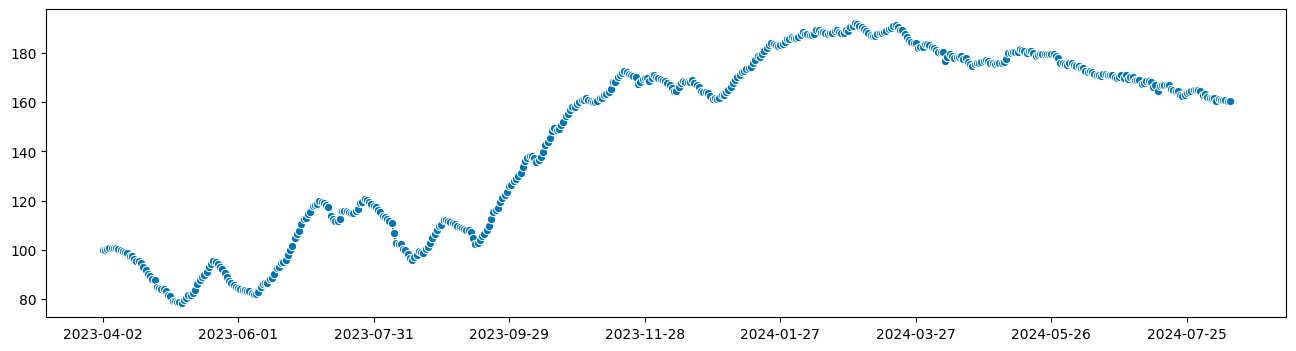

In [ ]:
from sktime.utils.plotting import plot_series
plot_series(prices_series)

# TEST2


In [ ]:
simulation = Market(150, 50, 5, 5, 200, 100, 99.9, 100.1)

In [ ]:
simulation.create_agents()

In [ ]:
prices = simulation.simulate()

In [ ]:
prices

array([ 99.96369748, 100.14690566, 100.20801336, 100.18141304,
       100.52133152, 101.19240672, 102.03560976, 102.39427692,
       101.80112628, 106.32661191, 105.98789062, 109.11405622,
       111.77737439, 114.93509434, 113.16522682, 118.97805221,
       121.46913475, 126.68653986, 130.5977439 , 124.30660305,
       135.80835381, 141.05608791, 143.79311778, 145.2526477 ,
       155.98481481, 160.88077399, 164.99161702, 156.90457286,
       171.84519737, 178.11792916, 181.74512931, 196.53674912,
       191.34959459, 201.37884793, 204.63111111, 206.40418944,
       213.92450633, 216.01233244, 235.52474286, 233.115     ,
       248.42442105, 251.43904884, 244.36931507, 244.14613982,
       254.64568384, 255.0398227 , 261.66505618, 261.96336283,
       258.17884615, 251.8697482 , 257.67986928, 268.55887906,
       263.65088652, 273.23271667, 268.68267742, 268.1807732 ,
       266.43873449, 282.33026627, 283.84088757, 268.18462451,
       269.09264706, 282.00684211, 278.12408397, 278.75

In [ ]:
idx = pd.date_range('2023-04-02', periods = 200, freq='D')

In [ ]:
prices_series = pd.Series(prices, index = idx.to_period())

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

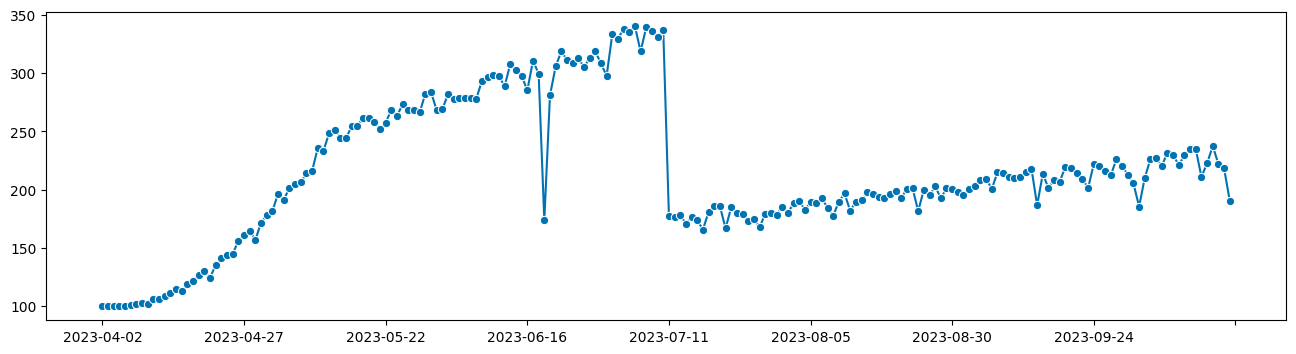

In [ ]:
from sktime.utils.plotting import plot_series
plot_series(prices_series)

Flash crash